In [1]:
!pip install unidecode
!pip install wikipedia
!pip install spacy
!python -m spacy download en
!python -m spacy download pt

     |████████████████████████████████| 245kB 2.7MB/s 
  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=ffafa199294405b5addceb6dab505109c37506c4d69eaf6282fd4800eec54413
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
     |████████████████████████████████| 21.2MB 1.2MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-cp36-none-any.whl size=21186282 sha256=e13d3fc3e64bfff707dc4fc340e00eddf0607a76fa8e923bccfdb01cdf009416
  Stored in directory: /tmp/pip-ephem-wheel-cache-klhknv8e/wheels/ea/94/74/ec9be8418e9231b471be5dc7e1b45dd670019a376a6b5bc1c0
Successfully built 

# Expressões Regulares

- O Pacote que permite utilizar ER é <b>re</b>
- Existem vários métodos para utilizar expressões regulares em python., alguns deles para <b>buscar</b> padrões são:

|   Método   |                                      Descrição                                     |
|:----------:|:----------------------------------------------------------------------------------:|
| match()    | Determina se a RE combina com o início da string.                                  |
| search()   | Varre toda a string, procurando qualquer local onde esta RE tem correspondência.   |
| findall()  | Encontra todas as substrings onde a RE corresponde, e as retorna como uma lista.   |
| finditer() | Encontra todas as substrings onde a RE corresponde, e as retorna como um iterador. |

- Métodos para modificar strings:

| Método  | Descrição                                                                                            |
|---------|------------------------------------------------------------------------------------------------------|
| split() | Divide a string em uma lista, dividindo-a onde quer que haja correspondência com a RE                |
| sub()   | Encontra todas as substrings que correspondem com a RE e faz a substituição por uma string diferente |
| subn()  |  É o mesmo que o método sub(), mas retorna a nova string e o número de substituições                 |


Link: https://docs.python.org/pt-br/3.8/howto/regex.html

Agora vamos exemplificar cada um desses métodos:

In [2]:
import re
import datetime

In [3]:
texto = "Vamos encontrar Padrões nesta string!! \nAgora é a nossa primeira prática de NLP!! Vamos aprender a procurar padrões!! \nBelo Horizonte, "+ str(datetime.datetime.now().date())+"."

In [4]:
print(texto)

Vamos encontrar Padrões nesta string!! 
Agora é a nossa primeira prática de NLP!! Vamos aprender a procurar padrões!! 
Belo Horizonte, 2020-09-29.


## Match
Determina se a RE combina com o início da string

In [5]:
re.match("Vamos", texto)

<_sre.SRE_Match object; span=(0, 5), match='Vamos'>

In [6]:
re.match("nesta", texto)

é case sensitive

In [7]:
re.match(r"vamos", texto)

## Search
Varre toda a string, procurando qualquer local onde esta RE tem correspondência

In [8]:
re.search("Vamos", texto)

<_sre.SRE_Match object; span=(0, 5), match='Vamos'>

In [9]:
re.search("encontrar", texto)

<_sre.SRE_Match object; span=(6, 15), match='encontrar'>

o default é case-sensitive

In [10]:
re.search("padrões", texto)

<_sre.SRE_Match object; span=(108, 115), match='padrões'>

In [11]:
re.search("Padrões", texto)

<_sre.SRE_Match object; span=(16, 23), match='Padrões'>

podemos ignorar case-sensitive

In [12]:
re.search("padrões", texto, re.IGNORECASE)

<_sre.SRE_Match object; span=(16, 23), match='Padrões'>

## Findall
Encontra todas as substrings onde a RE corresponde, e as retorna como uma lista

In [13]:
re.findall("Vamos", texto)

['Vamos', 'Vamos']

In [14]:
re.findall("padrões", texto)

['padrões']

re.I é igal re.IGNORECASE

In [15]:
re.findall("padrões", texto, re.I)

['Padrões', 'padrões']

In [16]:
#quando uso o + o padrão é 1 ou mais. Assim todas string que tem a no meio de outras letras  são retornadas
re.findall(r'\w+a\w+', texto)

['Vamos', 'encontrar', 'Padrões', 'Vamos', 'procurar', 'padrões']

In [17]:
#quando uso o * o padrão é 0 ou mais. Assim todas string que tem a no meio, ou no início ou no fim são retornadas
re.findall(r'\w*a\w*', texto)

['Vamos',
 'encontrar',
 'Padrões',
 'nesta',
 'Agora',
 'a',
 'nossa',
 'primeira',
 'prática',
 'Vamos',
 'aprender',
 'a',
 'procurar',
 'padrões']

## Finditer
Encontra todas as substrings onde a RE corresponde, e as retorna como um iterador.

In [18]:
re.finditer("Vamos", texto)

In [19]:
res = re.finditer("Vamos", texto)
[r for r in res]

[<_sre.SRE_Match object; span=(0, 5), match='Vamos'>,
 <_sre.SRE_Match object; span=(82, 87), match='Vamos'>]

In [20]:
re.finditer("padrões", texto)

In [21]:
re.finditer("padrões", texto, re.I)

## Split

In [22]:
re.split('\n',texto)

['Vamos encontrar Padrões nesta string!! ',
 'Agora é a nossa primeira prática de NLP!! Vamos aprender a procurar padrões!! ',
 'Belo Horizonte, 2020-09-29.']

In [23]:
texto.split("\s+")

['Vamos encontrar Padrões nesta string!! \nAgora é a nossa primeira prática de NLP!! Vamos aprender a procurar padrões!! \nBelo Horizonte, 2020-09-29.']

In [24]:
(re.split(r'\s+',texto))

['Vamos',
 'encontrar',
 'Padrões',
 'nesta',
 'string!!',
 'Agora',
 'é',
 'a',
 'nossa',
 'primeira',
 'prática',
 'de',
 'NLP!!',
 'Vamos',
 'aprender',
 'a',
 'procurar',
 'padrões!!',
 'Belo',
 'Horizonte,',
 '2020-09-29.']

## Sub

In [25]:
re.sub('\w+a\w+', 'a-word', texto)

'a-word a-word a-word nesta string!! \nAgora é a nossa primeira prática de NLP!! a-word aprender a a-word a-word!! \nBelo Horizonte, 2020-09-29.'

## Subn

In [26]:
re.subn('\w+a\w+', 'a-word', texto)

('a-word a-word a-word nesta string!! \nAgora é a nossa primeira prática de NLP!! a-word aprender a a-word a-word!! \nBelo Horizonte, 2020-09-29.',
 6)

# Exercícios

1. Escreva uma expressão regular para verificar se uma string contém apenas um determinado conjunto de caracteres (neste caso, a-z, A-Z e 0-9).

In [27]:
string1 = "ABCDEFabcdef123450"
string2 = "*&%@#!}{"

In [29]:
bool(re.search("\w", string1))

True

In [30]:
bool(re.search("\w", string2))

False

2. Escreva uma expressão regular que corresponda a uma sequência que tenha um a seguido por zero ou mais b's.

In [48]:
string1 = "abc"
string2 = "aacb"
string3 = "abbc"
string4 = "bb"

In [53]:
def check_regex(string):
  return bool(re.match("ab*" , string))

In [59]:
print(check_regex(string1))
print(check_regex(string2))
print(check_regex(string3))
print(check_regex(string4))

True
True
True
False


3. Escreva um expressão regular que corresponda a uma sequência que tenha um a seguido por um ou mais b's.

In [60]:
string1 = "abc"
string2 = "aacb"
string3 = "abbc"
string4 = "bb"

In [61]:
def check_regex(string):
  return bool(re.match("ab+" , string))

In [62]:
print(check_regex(string1))
print(check_regex(string2))
print(check_regex(string3))
print(check_regex(string4))

True
False
True
False


4. Escreva uma expressão regular para converter uma data do formato aaaa-mm-dd para o formato dd-mm-aaaa.

In [64]:
data1 = "2026-01-02"
data2 = "26-01-02"

In [70]:
re.sub(r"(\d{2,4})-(\d{1,2})-(\d{1,2})", "\\3-\\2-\\1", data1)

'02-01-2026'

In [69]:
re.sub(r"(\d{2,4})-(\d{1,2})-(\d{1,2})", "\\3-\\2-\\1", data2)

'02-01-26'

5. Escreva uma expressão para remover o excesso de espaço

In [71]:
string = "Exercídios     Expressão    Regular"

In [72]:
re.sub("\s+", " ", string)

'Exercídios Expressão Regular'

6. Escreva uma expressão para dividir uma string em letras maiúsculas

In [73]:
string = "ExercídiosExpressãoRegularAA"

In [76]:
re.findall(r"[A-Z][^A-Z]*",string)

['Exercídios', 'Expressão', 'Regular', 'A', 'A']

7. Escreva uma expressão regular para remover a área de parênteses em uma string


- Amostra de Entrada: 
> * ["example (.br)", "w3resource", "github (.com)", "stackoverflow (.com)"] </br>
* Saída Esperada: 
> * example
> * w3resource
> * github
> * stackoverflow

In [78]:
strings = ["example (.br)", "w3resource", "github (.com)", "stackoverflow (.??)"]

In [80]:
[re.sub("\(.*\)", "", r) for r in strings]

['example ', 'w3resource', 'github ', 'stackoverflow ']

8. Escreva um programa para quebrar um texto em sentenças

In [84]:
string = "Vamos encontrar Padrões nesta string!! Agora é a nossa primeira prática de NLP!! Vamos aprender a procurar padrões!! Belo Horizonte 2020."

In [89]:
re.split("[!.]+", string)

['Vamos encontrar Padrões nesta string',
 ' Agora é a nossa primeira prática de NLP',
 ' Vamos aprender a procurar padrões',
 ' Belo Horizonte 2020',
 '']

9. Escreva um código para remover os zeros iniciais do IP 216.08.094.196

In [90]:
ip = "216.08.094.196"

In [91]:
re.sub("\.0", ".", ip)

'216.8.94.196'

10. Recupere todos os "Twitter" do arquivo http://humanstxt.org/humans.txt

Exemplo de como recuperar o texto dete arquivo web:

```python
import requests
response = requests.get('http://humanstxt.org/humans.txt')
print(response.text)
```

Imprima a quantidade de twitters e todos twitters encontrados.

In [ ]:
import requests
response = requests.get('http://humanstxt.org/humans.txt')
print(response.text)

In [99]:
t = re.findall(r"@\w+", response.text)

In [100]:
len(t)

15

# Técnicas de Pré-processamento

In [101]:
import nltk
import wikipedia
import re
import spacy
from nltk.probability import FreqDist
import pt_core_news_sm
import en_core_web_sm
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> all
Command 'all' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
  

True

## Definindo o corpus

Primeiramente, definimos o corpus que iremos trabalhar.

In [102]:
# Caso o pacote wikipedia não funcione:
## Entre no link e faça downaload do arquivo https://drive.google.com/open?id=15R1jcugeM5SoGSPIPyG_6X6F3oMlxSBt
## Depois leia com o comando abaixo
#file = open("pln_wikipedia.txt", 'r')
#file_wiki = file.readlines()
#file.close()
#corpus = '\n'.join(file_wiki)

In [103]:
wikipedia.set_lang("pt")

In [104]:
pln = wikipedia.page("PLN")

In [105]:
corpus = pln.content

In [106]:
print("O texto que estamos utilizando é da URL",pln.url)

O texto que estamos utilizando é da URL https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural


In [107]:
print(pln.content)

Processamento de língua natural (PLN) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais, mais facilmente manipuláveis por programas de computador. Alguns desafios do PLN são compreensão de língua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural.


== História ==
A história do PLN começou na década de 1950, quando Alan Turing publicou o artigo "Computing Machinery and Intelligence", que propunha o que agora é chamado de teste de Turing como critério de inteligência.
Em 1954, a experiência de Georgetown envolveu a tradução automática de mais de sessenta frases 

## Tokenização

Existem várias formas de realizar tokenização. 
1. Split()
2. Regex
3. NLTK
4. ...

### Split

Faça utilizando o método abaixo
<b> Não esqueça de armazenar o resultado na variável abaixo. </b>

```python
str.split()
```

In [108]:
tokens_split = corpus.split()

In [109]:
#problema do split é que ele não separa as pontuações.
print(tokens_split)

['Processamento', 'de', 'língua', 'natural', '(PLN)', 'é', 'uma', 'subárea', 'da', 'ciência', 'da', 'computação,', 'inteligência', 'artificial', 'e', 'da', 'linguística', 'que', 'estuda', 'os', 'problemas', 'da', 'geração', 'e', 'compreensão', 'automática', 'de', 'línguas', 'humanas', 'naturais.', 'Sistemas', 'de', 'geração', 'de', 'língua', 'natural', 'convertem', 'informação', 'de', 'bancos', 'de', 'dados', 'de', 'computadores', 'em', 'linguagem', 'compreensível', 'ao', 'ser', 'humano', 'e', 'sistemas', 'de', 'compreensão', 'de', 'língua', 'natural', 'convertem', 'ocorrências', 'de', 'linguagem', 'humana', 'em', 'representações', 'mais', 'formais,', 'mais', 'facilmente', 'manipuláveis', 'por', 'programas', 'de', 'computador.', 'Alguns', 'desafios', 'do', 'PLN', 'são', 'compreensão', 'de', 'língua', 'natural,', 'fazer', 'com', 'que', 'computadores', 'extraiam', 'sentido', 'de', 'linguagem', 'humana', 'ou', 'natural', 'e', 'geração', 'de', 'língua', 'natural.', '==', 'História', '==', 

### Regex

Faça utilizando o método abaixo
<b> Não esqueça de armazenar o resultado na variável abaixo. </b>

```python
re.findall(r"\w+(?:'\w+)?|[^\w\s]", corpus)
```

In [110]:
tokens_regex = re.findall(r"\w+(?:'\w+)?|[^\w\s]", corpus)

In [111]:
#Regex
print(tokens_regex)

['Processamento', 'de', 'língua', 'natural', '(', 'PLN', ')', 'é', 'uma', 'subárea', 'da', 'ciência', 'da', 'computação', ',', 'inteligência', 'artificial', 'e', 'da', 'linguística', 'que', 'estuda', 'os', 'problemas', 'da', 'geração', 'e', 'compreensão', 'automática', 'de', 'línguas', 'humanas', 'naturais', '.', 'Sistemas', 'de', 'geração', 'de', 'língua', 'natural', 'convertem', 'informação', 'de', 'bancos', 'de', 'dados', 'de', 'computadores', 'em', 'linguagem', 'compreensível', 'ao', 'ser', 'humano', 'e', 'sistemas', 'de', 'compreensão', 'de', 'língua', 'natural', 'convertem', 'ocorrências', 'de', 'linguagem', 'humana', 'em', 'representações', 'mais', 'formais', ',', 'mais', 'facilmente', 'manipuláveis', 'por', 'programas', 'de', 'computador', '.', 'Alguns', 'desafios', 'do', 'PLN', 'são', 'compreensão', 'de', 'língua', 'natural', ',', 'fazer', 'com', 'que', 'computadores', 'extraiam', 'sentido', 'de', 'linguagem', 'humana', 'ou', 'natural', 'e', 'geração', 'de', 'língua', 'natural

### NLTK

Faça utilizando o método abaixo.
<b> Não esqueça de armazenar o resultado na variável abaixo. </b>

```python
nltk.word_tokenize(corpus)
```

In [112]:
tokens_nltk = nltk.word_tokenize(corpus)

In [113]:
#NLTK
print(tokens_nltk)

['Processamento', 'de', 'língua', 'natural', '(', 'PLN', ')', 'é', 'uma', 'subárea', 'da', 'ciência', 'da', 'computação', ',', 'inteligência', 'artificial', 'e', 'da', 'linguística', 'que', 'estuda', 'os', 'problemas', 'da', 'geração', 'e', 'compreensão', 'automática', 'de', 'línguas', 'humanas', 'naturais', '.', 'Sistemas', 'de', 'geração', 'de', 'língua', 'natural', 'convertem', 'informação', 'de', 'bancos', 'de', 'dados', 'de', 'computadores', 'em', 'linguagem', 'compreensível', 'ao', 'ser', 'humano', 'e', 'sistemas', 'de', 'compreensão', 'de', 'língua', 'natural', 'convertem', 'ocorrências', 'de', 'linguagem', 'humana', 'em', 'representações', 'mais', 'formais', ',', 'mais', 'facilmente', 'manipuláveis', 'por', 'programas', 'de', 'computador', '.', 'Alguns', 'desafios', 'do', 'PLN', 'são', 'compreensão', 'de', 'língua', 'natural', ',', 'fazer', 'com', 'que', 'computadores', 'extraiam', 'sentido', 'de', 'linguagem', 'humana', 'ou', 'natural', 'e', 'geração', 'de', 'língua', 'natural

In [114]:
def plot_frequencia_tokens(tokens):
    fd_words = FreqDist(tokens)
    fd_words.plot(20)

### Plot das tokenizações

Plote o resultado de cada uma das tokenizações. 
Utilize o método <b> plot_frequencia_tokens() </b> para plotar o gráfico.
Também imprima o tamanho de cada tokenização

Tokens Split


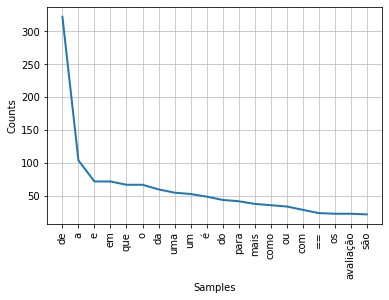

In [115]:
print("Tokens Split")
plot_frequencia_tokens(tokens_split)

Tokens Regex


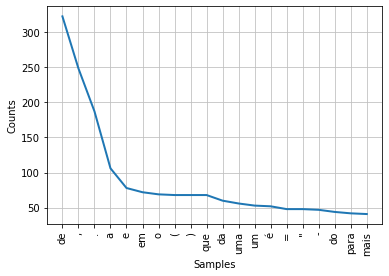

In [116]:
print("Tokens Regex")
plot_frequencia_tokens(tokens_regex)

Tokens NLTK


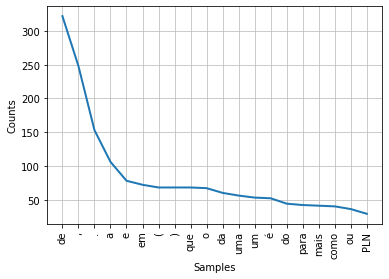

In [117]:
print("Tokens NLTK")
plot_frequencia_tokens(tokens_nltk)

Como foi possível observar, existem variações nas tokenizações realizadas. 
A que gerou mais tokens foi a que utilizou regex.
Por isso iremos utilizá-la a partir deste ponto.
Utilize o resultado de <b> tokens_regex</b>.

## Capitalização

traforme todos os tokens para minúsculo utilizando a função abaixo:

```python
str.lower()
```

In [119]:
tokens = [t.lower() for t in tokens_regex]

In [121]:
print(tokens)

['processamento', 'de', 'língua', 'natural', '(', 'pln', ')', 'é', 'uma', 'subárea', 'da', 'ciência', 'da', 'computação', ',', 'inteligência', 'artificial', 'e', 'da', 'linguística', 'que', 'estuda', 'os', 'problemas', 'da', 'geração', 'e', 'compreensão', 'automática', 'de', 'línguas', 'humanas', 'naturais', '.', 'sistemas', 'de', 'geração', 'de', 'língua', 'natural', 'convertem', 'informação', 'de', 'bancos', 'de', 'dados', 'de', 'computadores', 'em', 'linguagem', 'compreensível', 'ao', 'ser', 'humano', 'e', 'sistemas', 'de', 'compreensão', 'de', 'língua', 'natural', 'convertem', 'ocorrências', 'de', 'linguagem', 'humana', 'em', 'representações', 'mais', 'formais', ',', 'mais', 'facilmente', 'manipuláveis', 'por', 'programas', 'de', 'computador', '.', 'alguns', 'desafios', 'do', 'pln', 'são', 'compreensão', 'de', 'língua', 'natural', ',', 'fazer', 'com', 'que', 'computadores', 'extraiam', 'sentido', 'de', 'linguagem', 'humana', 'ou', 'natural', 'e', 'geração', 'de', 'língua', 'natural

 <b> <span style="color:red"> Lembre de utilizar a VARIÁVEL que contém o resultado da transformação anterior.
    Se você acompanhar o nome da variável que já está na célula não tem erro! :) </span> </b>

## Remoção Stopwords

remova todas as stopwords retornadas pelo pacote NLTK da lista de tokens.

```python
portugues_stops = stopwords.words('portuguese')
```

In [122]:
from nltk.corpus import stopwords

In [123]:
portugues_stops = stopwords.words('portuguese')

In [124]:
#imprima as stopwords para você conhecer
print(portugues_stops)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [125]:
tokens_sem_stop = [t for t in tokens if t not in portugues_stops]

In [126]:
print(tokens_sem_stop)

['processamento', 'língua', 'natural', '(', 'pln', ')', 'subárea', 'ciência', 'computação', ',', 'inteligência', 'artificial', 'linguística', 'estuda', 'problemas', 'geração', 'compreensão', 'automática', 'línguas', 'humanas', 'naturais', '.', 'sistemas', 'geração', 'língua', 'natural', 'convertem', 'informação', 'bancos', 'dados', 'computadores', 'linguagem', 'compreensível', 'ser', 'humano', 'sistemas', 'compreensão', 'língua', 'natural', 'convertem', 'ocorrências', 'linguagem', 'humana', 'representações', 'formais', ',', 'facilmente', 'manipuláveis', 'programas', 'computador', '.', 'alguns', 'desafios', 'pln', 'compreensão', 'língua', 'natural', ',', 'fazer', 'computadores', 'extraiam', 'sentido', 'linguagem', 'humana', 'natural', 'geração', 'língua', 'natural', '.', '=', '=', 'história', '=', '=', 'história', 'pln', 'começou', 'década', '1950', ',', 'alan', 'turing', 'publicou', 'artigo', '"', 'computing', 'machinery', 'and', 'intelligence', '"', ',', 'propunha', 'agora', 'chamado'

## Remoção Números

remova todos os números, utilizando uma regex

```python
re.sub(__,__,__)
```

In [127]:
tokens_sem_numbers = [re.sub("\d", "", t) for t in tokens_sem_stop]

In [128]:
print(tokens_sem_numbers)

['processamento', 'língua', 'natural', '(', 'pln', ')', 'subárea', 'ciência', 'computação', ',', 'inteligência', 'artificial', 'linguística', 'estuda', 'problemas', 'geração', 'compreensão', 'automática', 'línguas', 'humanas', 'naturais', '.', 'sistemas', 'geração', 'língua', 'natural', 'convertem', 'informação', 'bancos', 'dados', 'computadores', 'linguagem', 'compreensível', 'ser', 'humano', 'sistemas', 'compreensão', 'língua', 'natural', 'convertem', 'ocorrências', 'linguagem', 'humana', 'representações', 'formais', ',', 'facilmente', 'manipuláveis', 'programas', 'computador', '.', 'alguns', 'desafios', 'pln', 'compreensão', 'língua', 'natural', ',', 'fazer', 'computadores', 'extraiam', 'sentido', 'linguagem', 'humana', 'natural', 'geração', 'língua', 'natural', '.', '=', '=', 'história', '=', '=', 'história', 'pln', 'começou', 'década', '', ',', 'alan', 'turing', 'publicou', 'artigo', '"', 'computing', 'machinery', 'and', 'intelligence', '"', ',', 'propunha', 'agora', 'chamado', 't

## Remoção Pontuação

remova todas as pontruações retornadas pelo pacote string da lista de tokens.

```python
string.punctuation
```

In [129]:
import string

In [130]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [132]:
tokens_sem_punction = [t for t in tokens_sem_numbers if t not in string.punctuation]

In [134]:
print(tokens_sem_punction)

['processamento', 'língua', 'natural', 'pln', 'subárea', 'ciência', 'computação', 'inteligência', 'artificial', 'linguística', 'estuda', 'problemas', 'geração', 'compreensão', 'automática', 'línguas', 'humanas', 'naturais', 'sistemas', 'geração', 'língua', 'natural', 'convertem', 'informação', 'bancos', 'dados', 'computadores', 'linguagem', 'compreensível', 'ser', 'humano', 'sistemas', 'compreensão', 'língua', 'natural', 'convertem', 'ocorrências', 'linguagem', 'humana', 'representações', 'formais', 'facilmente', 'manipuláveis', 'programas', 'computador', 'alguns', 'desafios', 'pln', 'compreensão', 'língua', 'natural', 'fazer', 'computadores', 'extraiam', 'sentido', 'linguagem', 'humana', 'natural', 'geração', 'língua', 'natural', 'história', 'história', 'pln', 'começou', 'década', 'alan', 'turing', 'publicou', 'artigo', 'computing', 'machinery', 'and', 'intelligence', 'propunha', 'agora', 'chamado', 'teste', 'turing', 'critério', 'inteligência', 'experiência', 'georgetown', 'envolveu'

In [133]:
sorted(tokens_sem_punction)

['abertas',
 'abordagem',
 'abordagem',
 'abordagem',
 'abordagens',
 'abordagens',
 'abordagens',
 'abrange',
 'abrange',
 'abrangem',
 'absurda',
 'acima',
 'acl',
 'acordo',
 'adda',
 'adequadamente',
 'adicionais',
 'adicional',
 'adjetivo',
 'adjetivos',
 'afirmaram',
 'afirmação',
 'aglutinada',
 'agora',
 'agora',
 'agregar',
 'agrupada',
 'agrupados',
 'ai',
 'ai',
 'ainda',
 'ajudar',
 'ajudar',
 'alan',
 'alemanha',
 'alemães',
 'alemão',
 'alemão',
 'algoritmo',
 'algoritmo',
 'algoritmos',
 'algoritmos',
 'algoritmos',
 'algoritmos',
 'algoritmos',
 'algoritmos',
 'algoritmos',
 'algoritmos',
 'algoritmos',
 'algoritmos',
 'algoritmos',
 'algoritmos',
 'algorítmico',
 'algum',
 'alguma',
 'alguma',
 'algumas',
 'algumas',
 'algumas',
 'algumas',
 'algumas',
 'alguns',
 'alguns',
 'alguns',
 'alguns',
 'alguns',
 'alguns',
 'alguns',
 'alguns',
 'alguns',
 'alguns',
 'alguns',
 'alguém',
 'alocação',
 'alpac',
 'além',
 'além',
 'ambiguidade',
 'ambiguidade',
 'ambiguidade',

## Remoção Acentos

remova todos os acentos utilizando a função abaixo:

```python
unidecode(str)
```

In [139]:
from unidecode import unidecode

In [141]:
tokens_sem_acentos = [unidecode(t) for t in tokens_sem_punction]

In [142]:
print(tokens_sem_acentos)

['processamento', 'lingua', 'natural', 'pln', 'subarea', 'ciencia', 'computacao', 'inteligencia', 'artificial', 'linguistica', 'estuda', 'problemas', 'geracao', 'compreensao', 'automatica', 'linguas', 'humanas', 'naturais', 'sistemas', 'geracao', 'lingua', 'natural', 'convertem', 'informacao', 'bancos', 'dados', 'computadores', 'linguagem', 'compreensivel', 'ser', 'humano', 'sistemas', 'compreensao', 'lingua', 'natural', 'convertem', 'ocorrencias', 'linguagem', 'humana', 'representacoes', 'formais', 'facilmente', 'manipulaveis', 'programas', 'computador', 'alguns', 'desafios', 'pln', 'compreensao', 'lingua', 'natural', 'fazer', 'computadores', 'extraiam', 'sentido', 'linguagem', 'humana', 'natural', 'geracao', 'lingua', 'natural', 'historia', 'historia', 'pln', 'comecou', 'decada', 'alan', 'turing', 'publicou', 'artigo', 'computing', 'machinery', 'and', 'intelligence', 'propunha', 'agora', 'chamado', 'teste', 'turing', 'criterio', 'inteligencia', 'experiencia', 'georgetown', 'envolveu'

###  Plote a frequência dos tokens sem acentos. Utilize o método plot_frequencia_tokens() para plotar o gráfico. Também imprima o tamanho desta lista. 

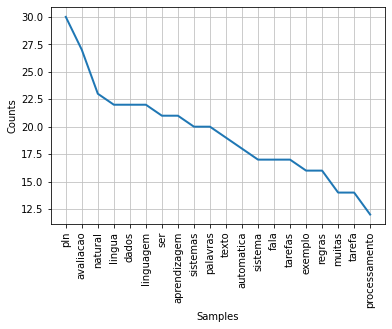

In [143]:
#tokens_sem_acentos
plot_frequencia_tokens(tokens_sem_acentos)

## Stemming

Iremos utilizar o stemming da biblioteca NLTK. O algoritmo disponível para este procedimento em portugês é o RSLPStemmer.

```python
stemmer = nltk.stem.RSLPStemmer()
#para cada token:
stemmer.stem(token)
```

Aplique o stemmet em cada elemento da lista de tokens.


In [146]:
stemmer = nltk.stem.RSLPStemmer()

In [148]:
tokens_stemmer = [stemmer.stem(t) for t in tokens_sem_acentos]

In [149]:
print(tokens_stemmer)

['process', 'lingu', 'natur', 'pln', 'subare', 'cienc', 'computaca', 'inteligenc', 'artific', 'linguis', 'estud', 'problem', 'geraca', 'compreensa', 'automa', 'lingu', 'human', 'natur', 'sistem', 'geraca', 'lingu', 'natur', 'convert', 'informaca', 'banc', 'dad', 'comput', 'lingu', 'compreensi', 'ser', 'human', 'sistem', 'compreensa', 'lingu', 'natur', 'convert', 'ocorrenc', 'lingu', 'human', 'representaco', 'formal', 'facil', 'manipula', 'program', 'comput', 'algum', 'desafi', 'pln', 'compreensa', 'lingu', 'natur', 'faz', 'comput', 'extra', 'sent', 'lingu', 'human', 'natur', 'geraca', 'lingu', 'natur', 'hist', 'hist', 'pln', 'comec', 'dec', 'alan', 'turing', 'public', 'artig', 'computing', 'machinery', 'and', 'intelligenc', 'propunh', 'agor', 'cham', 'test', 'turing', 'criteri', 'inteligenc', 'experienc', 'georgetown', 'envolv', 'traduca', 'automa', 'sessent', 'fras', 'russ', 'ingl', 'autor', 'afirm', 'dentr', 'tre', 'cinc', 'ano', 'traduca', 'automa', 'problem', 'resolv', 'entant', 'a

###  Plote a frequência dos tokens após o processo de stemming. Utilize o método plot_frequencia_tokens() para plotar o gráfico. Também imprima o tamanho desta lista. 

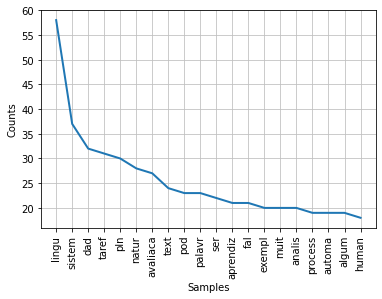

In [150]:
#tokens_stemmer
plot_frequencia_tokens(tokens_stemmer)

## Lemmatization
a biblitoteca NLTK não possui lematização para português.
Mas a scpaCy possui.

In [151]:
#carrega o modelo para português
#nlp = spacy.load('pt')
nlp = pt_core_news_sm.load()

Você pode executar a <b> lematização </b> com acentos ou sem acentos. Funciona da mesma forma.

A primeira etapa para executar a lematização é transformar a lista de tokens para uma string. 
Utilize a variável de tokens: <b> tokens_sem_punction </b>.

Dica: utilize o método join para isto:

```python
str.join(list)

```

In [170]:
print(tokens_sem_punction)

['processamento', 'língua', 'natural', 'pln', 'subárea', 'ciência', 'computação', 'inteligência', 'artificial', 'linguística', 'estuda', 'problemas', 'geração', 'compreensão', 'automática', 'línguas', 'humanas', 'naturais', 'sistemas', 'geração', 'língua', 'natural', 'convertem', 'informação', 'bancos', 'dados', 'computadores', 'linguagem', 'compreensível', 'ser', 'humano', 'sistemas', 'compreensão', 'língua', 'natural', 'convertem', 'ocorrências', 'linguagem', 'humana', 'representações', 'formais', 'facilmente', 'manipuláveis', 'programas', 'computador', 'alguns', 'desafios', 'pln', 'compreensão', 'língua', 'natural', 'fazer', 'computadores', 'extraiam', 'sentido', 'linguagem', 'humana', 'natural', 'geração', 'língua', 'natural', 'história', 'história', 'pln', 'começou', 'década', 'alan', 'turing', 'publicou', 'artigo', 'computing', 'machinery', 'and', 'intelligence', 'propunha', 'agora', 'chamado', 'teste', 'turing', 'critério', 'inteligência', 'experiência', 'georgetown', 'envolveu'

In [175]:
str_tokens = ' '.join(tokens_sem_punction)

In [176]:
print(str_tokens)

processamento língua natural pln subárea ciência computação inteligência artificial linguística estuda problemas geração compreensão automática línguas humanas naturais sistemas geração língua natural convertem informação bancos dados computadores linguagem compreensível ser humano sistemas compreensão língua natural convertem ocorrências linguagem humana representações formais facilmente manipuláveis programas computador alguns desafios pln compreensão língua natural fazer computadores extraiam sentido linguagem humana natural geração língua natural história história pln começou década alan turing publicou artigo computing machinery and intelligence propunha agora chamado teste turing critério inteligência experiência georgetown envolveu tradução automática sessenta frases russas inglês autores afirmaram dentro três cinco anos tradução automática problema resolvido entanto avanços reais lentos previsto após relatório alpac constatou pesquisa dez anos conseguiu satisfazer expectativas 

Depois carregue a string de tokens (<b>str_tokens</b>) no modelo <b> nlp </b>, carregado em um dos passos anteriores.

```python
doc = nlp(str_tokens)
```

In [177]:
doc = nlp(str_tokens)

Verifique o tipo da variável <b> doc </b>.
Observe que é do tipo spacy.tokens.doc.Doc

In [178]:
type(doc)

spacy.tokens.doc.Doc

Como tipo da variável doc é do tipo spacy.tokens.doc.Doc.
Apenas é preciso iterar em cada token e retornar o atributo <b> lemma_</b>

In [180]:
print(doc)

processamento língua natural pln subárea ciência computação inteligência artificial linguística estuda problemas geração compreensão automática línguas humanas naturais sistemas geração língua natural convertem informação bancos dados computadores linguagem compreensível ser humano sistemas compreensão língua natural convertem ocorrências linguagem humana representações formais facilmente manipuláveis programas computador alguns desafios pln compreensão língua natural fazer computadores extraiam sentido linguagem humana natural geração língua natural história história pln começou década alan turing publicou artigo computing machinery and intelligence propunha agora chamado teste turing critério inteligência experiência georgetown envolveu tradução automática sessenta frases russas inglês autores afirmaram dentro três cinco anos tradução automática problema resolvido entanto avanços reais lentos previsto após relatório alpac constatou pesquisa dez anos conseguiu satisfazer expectativas 

In [181]:
token_lemm = [t.lemma_ for t in doc]

In [183]:
print(token_lemm)

['processamento', 'língua', 'natural', 'pln', 'subárea', 'ciência', 'computação', 'inteligência', 'artificial', 'linguístico', 'estudar', 'problema', 'geração', 'compreensão', 'automático', 'língua', 'humano', 'natural', 'sistema', 'geração', 'língua', 'natural', 'converter', 'informação', 'banco', 'dar', 'computador', 'linguagem', 'compreensível', 'ser', 'humanar', 'sistema', 'compreensão', 'língua', 'natural', 'converter', 'ocorrência', 'linguagem', 'humano', 'representação', 'formar', 'facilmente', 'manipulável', 'programar', 'computador', 'algum', 'desafio', 'pln', 'compreensão', 'língua', 'natural', 'fazer', 'computador', 'extrair', 'sentir', 'linguagem', 'humano', 'natural', 'geração', 'língua', 'natural', 'história', 'história', 'pln', 'começar', 'década', 'alan', 'turing', 'publicar', 'artigo', 'computing', 'machinery', 'and', 'intelligence', 'propor', 'agora', 'chamar', 'testar', 'turing', 'critério', 'inteligência', 'experiência', 'georgetown', 'envolver', 'tradução', 'automá

In [182]:
len(token_lemm)

2528

###  Plote a frequência dos tokens após o processo de lematização. Utilize o método plot_frequencia_tokens() para plotar o gráfico. Também imprima o tamanho desta lista. 

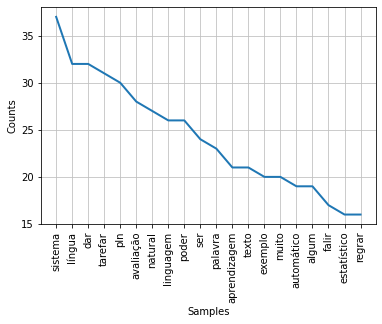

In [184]:
#token_lemm
plot_frequencia_tokens(token_lemm)

# Perguntas?

## 1. Quais diferenças você entrou entre os métodos de tokenização. Cite ao menos 3 tokens com resultados diferentes.

Na tokenização por split um token foi '(PLN)' e no método por regex foi '(', 'PLN', ')'. Outra diferença foi '==' na primeira tokenização e '=' na segunda.
Mais uma foi '(CULLINGFORD,' na primeira tokenização e 'CULLINGFORD' na segunda.

## 2. Qual a principal diferença que você verificou entre o processo de stemming e de lematização?

No processo de stemming as palavras foram reduzidas ao seu radical. Já na lematização as palavras foram convertidas em uma palavra padronizadas, como por exemplo 'automática' virou 'automático'.